In [4]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [8]:
from pandas_datareader import data, wb


In [7]:
from datetime import datetime


In [9]:
tech_list = ['GOOG','MSFT','AMZN','TSLA','AAPL']

In [11]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [12]:

for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [13]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,194.042680,190.123120,192.044120,192.142160,3.256990e+07,190.710720
std,21.766842,21.541791,21.627772,21.635320,1.392167e+07,21.181820
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,141.039642
25%,175.902496,173.362499,174.737499,174.757500,2.316590e+07,173.937672
50%,194.665001,190.599998,191.794998,192.404999,2.970625e+07,190.797394
75%,210.104996,206.977501,209.317505,208.877502,3.876678e+07,206.773453
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-07-09 to 2019-07-05
Data columns (total 6 columns):
High         250 non-null float64
Low          250 non-null float64
Open         250 non-null float64
Close        250 non-null float64
Volume       250 non-null float64
Adj Close    250 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


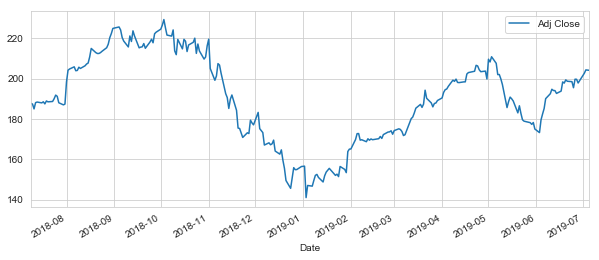

In [15]:

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

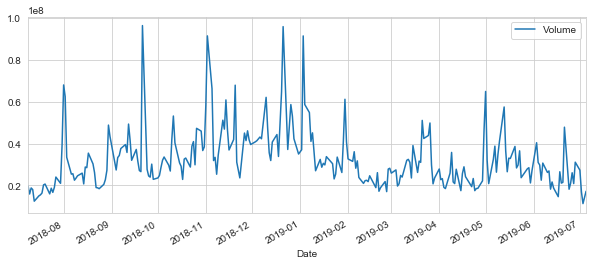

In [16]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [17]:
ma_day = [30]

In [18]:

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

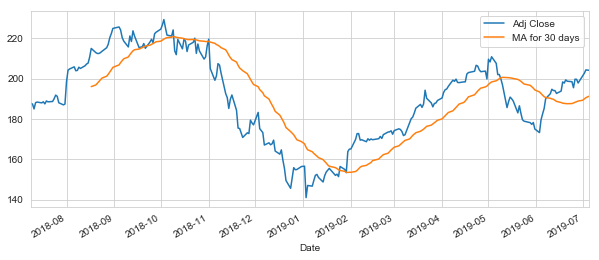

In [20]:
AAPL[['Adj Close','MA for 30 days']].plot(subplots=False,figsize=(10,4))

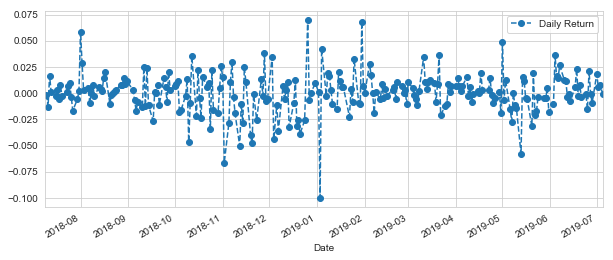

In [21]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

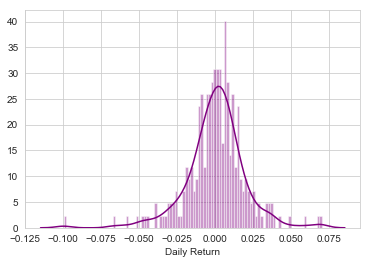

In [22]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

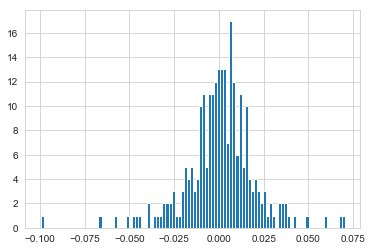

In [23]:
AAPL['Daily Return'].hist(bins=100)

In [24]:
closing_df = data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [25]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2018-07-09,187.722488,1739.020020,1154.050049,100.222542,318.510010
2018-07-10,187.495941,1743.069946,1152.839966,100.488220,322.470001
2018-07-11,185.062973,1755.000000,1153.900024,100.350464,318.959991
2018-07-12,188.165741,1796.619995,1183.479980,102.525146,316.709991
2018-07-13,188.461243,1813.030029,1188.819946,103.745331,318.869995


In [26]:
# finding the percentage changes for returns per company

tech_returns = closing_df.pct_change().dropna()
tech_returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2018-07-10,-0.001207,0.002329,-0.001049,0.002651,0.012433
2018-07-11,-0.012976,0.006844,0.000920,-0.001371,-0.010885
2018-07-12,0.016766,0.023715,0.025635,0.021671,-0.007054
2018-07-13,0.001570,0.009134,0.004512,0.011901,0.006820
2018-07-16,-0.002195,0.005218,-0.004172,-0.004932,-0.027503


/Users/academy_intern/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


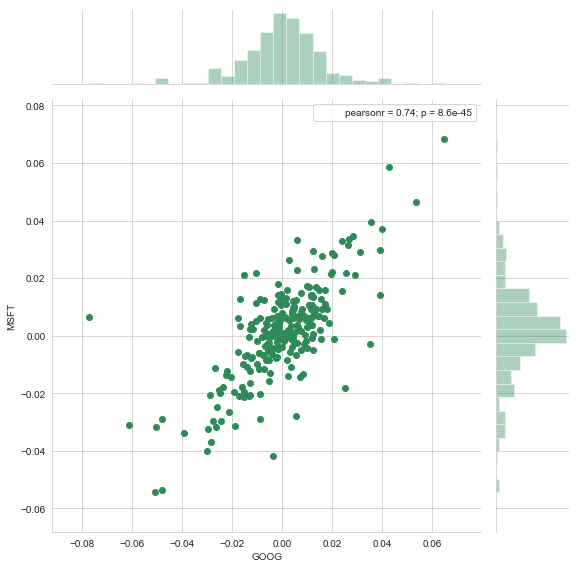

In [27]:

import scipy.stats as sci
sns.jointplot('GOOG','MSFT',tech_returns,kind="scatter",color='seagreen',height=8,stat_func=sci.pearsonr)
# sns.jointplot("GOOG", "MSFT", data=tech_returns, kind='kde')

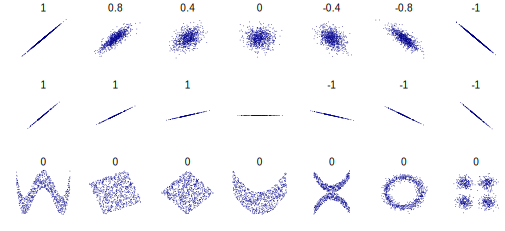

In [28]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

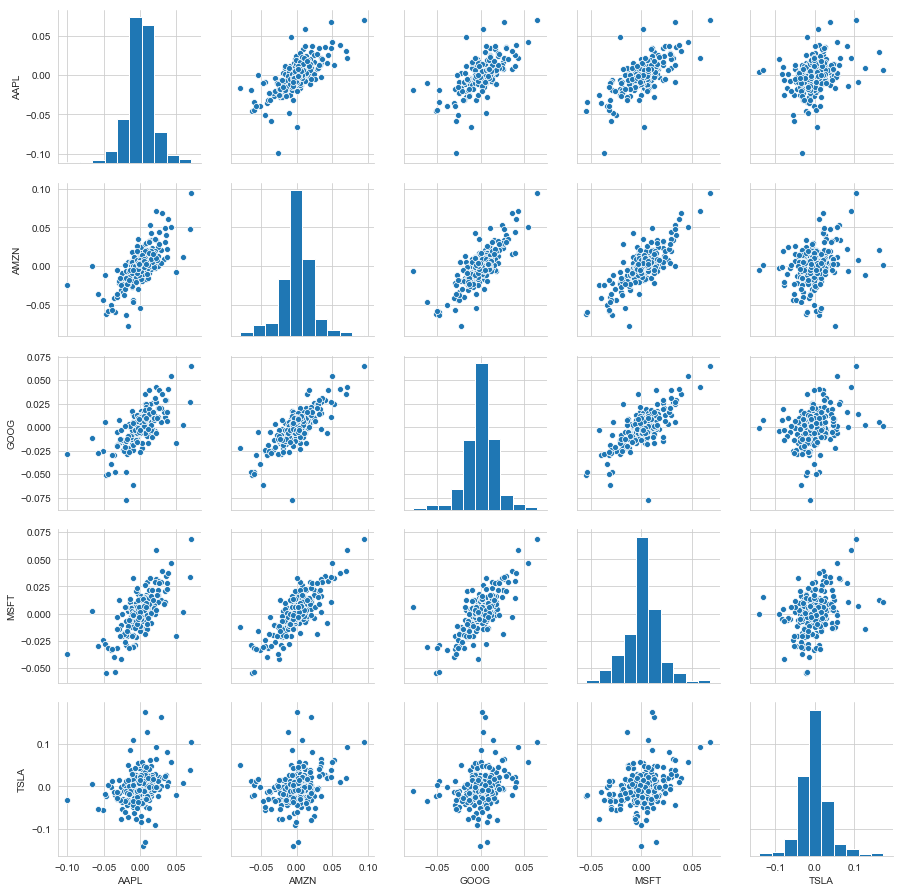

In [29]:
sns.pairplot(tech_returns.dropna(), palette="husl")

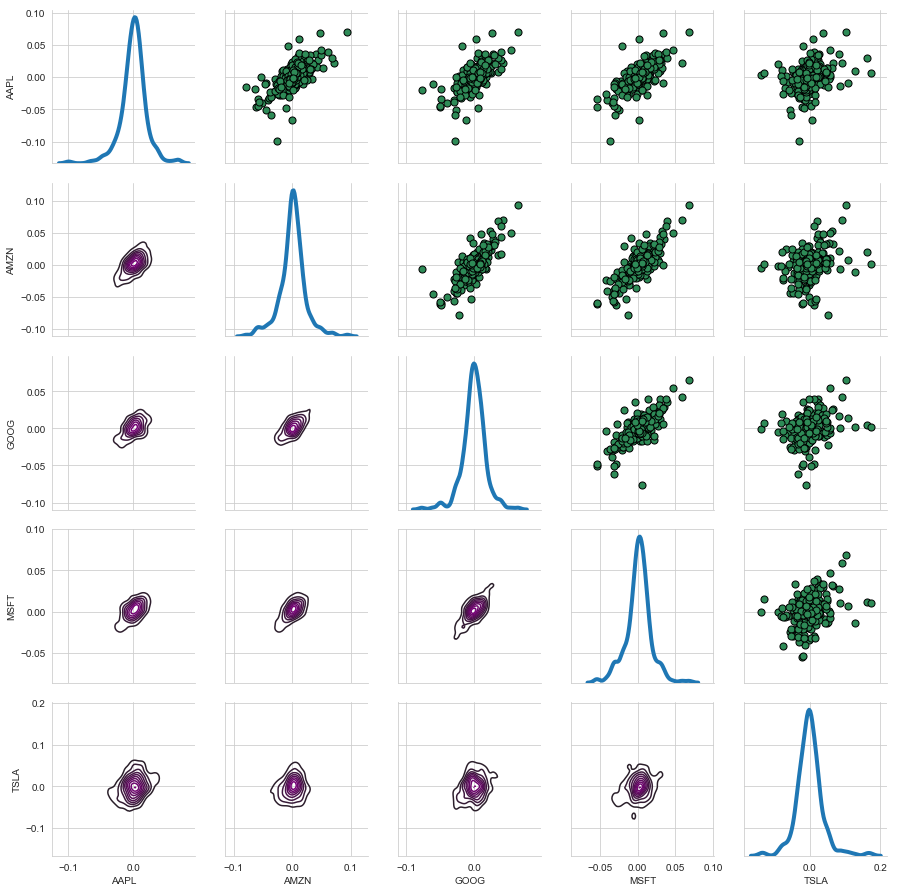

In [30]:
g = sns.PairGrid(tech_returns,diag_sharey=False, palette="GnBu_d")
g.map_upper(plt.scatter, s=50, edgecolor="black", color='seagreen', )
g.map_lower(sns.kdeplot, color = "purple")
g.map_diag(sns.kdeplot, lw=4);

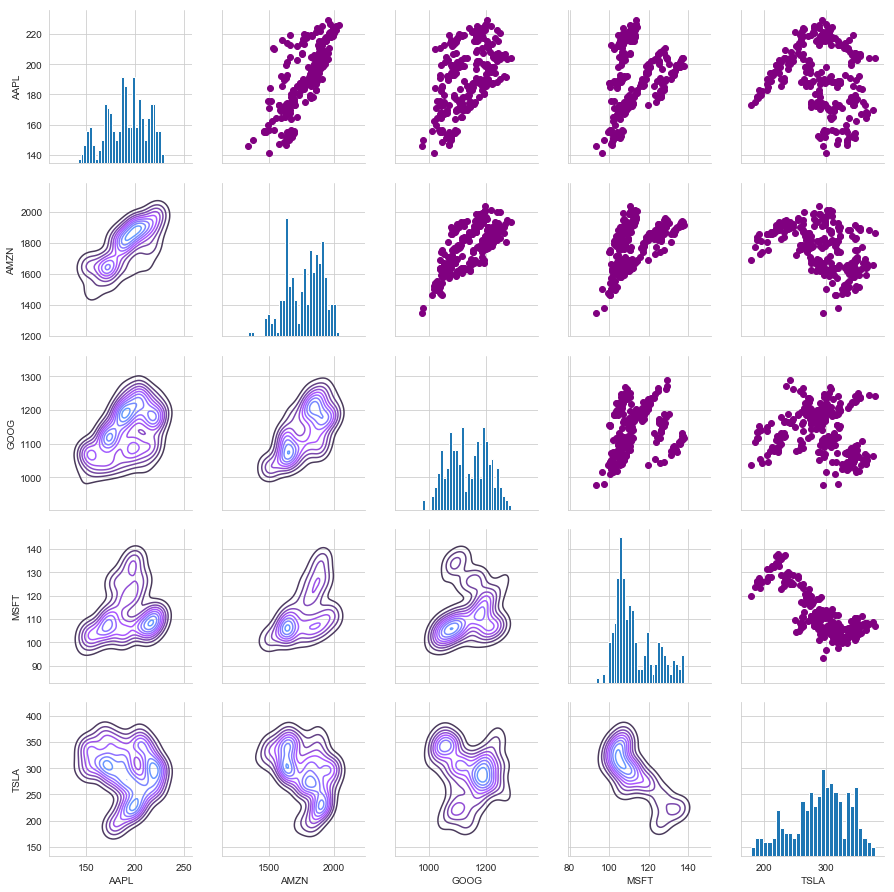

In [31]:

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

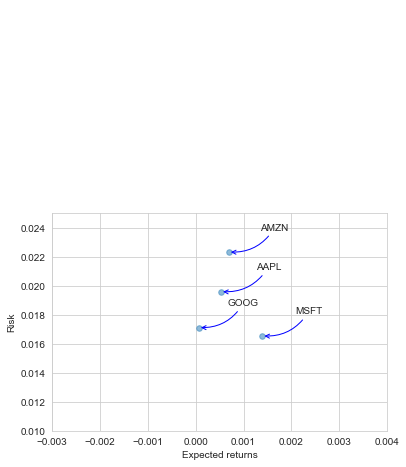

In [32]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_returns.dropna()

area = np.pi*10

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (60, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad =-0.3',color ='b'))
    ##arrowstyle="->",
                            ##connectionstyle="arc"


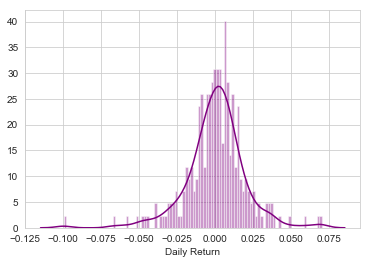

In [33]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [34]:

# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [35]:

def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

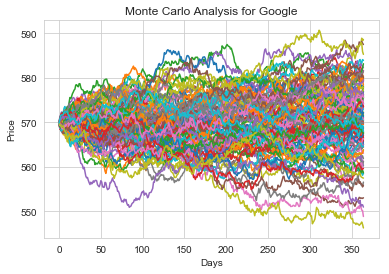

In [36]:
# Get start price from GOOG.head()
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [37]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

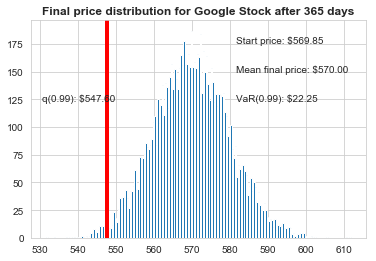

In [38]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');